### Linear Regression with one variable, implemented by numpy

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

### Load Dataset
- X = number of claims
- Y = total payment for all the claims in thousands of Swedish Kronor(krona의 복수형 : 스웨덴과 아이슬란드의 화폐 단위)

for geographical zones in Sweden Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance

dataset from -  http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html

In [2]:
df = pd.read_csv('data/slr06.csv')
df

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


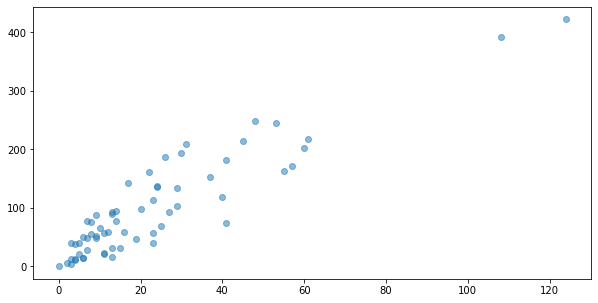

In [3]:
raw_X = df['X'].values.reshape(-1, 1)  # 2 dimensional
y = df['Y'].values                     # 1 dimensional

plt.figure(figsize = (10, 5))
plt.plot(raw_X, y, 'o', alpha = 0.5)

In [6]:
print(raw_X[:5], '\n'*2, y[:5])

[[108]
 [ 19]
 [ 13]
 [124]
 [ 40]] 

 [392.5  46.2  15.7 422.2 119.4]


In [8]:
np.ones((len(raw_X), 1))[:3]    # (63, 1)의 2-dimensional data

array([[1.],
       [1.],
       [1.]])

In [9]:
X = np.concatenate((np.ones((len(raw_X), 1)), raw_X), axis = 1)  # (상수값 X0, 변수값 X1)에 대응되는 (63, 2)의 2-dimensional data
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [10]:
w = np.random.normal((2, 1))    # 정규분포에서 값을 뽑아오는 np.random.normal로 가중치 w값 initialize
w

array([1.83925393, 2.66105423])

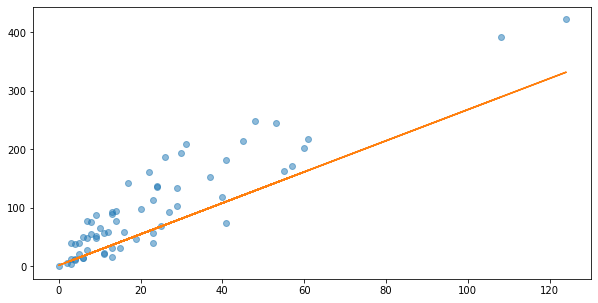

In [11]:
plt.figure(figsize = (10, 5))
y_predict = np.dot(X, w)       # hypothesis function
plt.plot(raw_X, y, 'o', alpha = 0.5)
plt.plot(raw_X, y_predict)

### Hypothesis and Cost Function

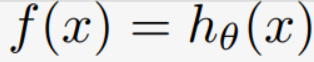

In [12]:
def hypothesis_function(X, theta):   # y = Xw
    return X.dot(theta)

In [13]:
h = hypothesis_function(X, w)
print(h.shape)
h[:5]

(63,)


array([289.23311106,  52.39928435,  36.43295896, 331.80997879,
       108.28142324])

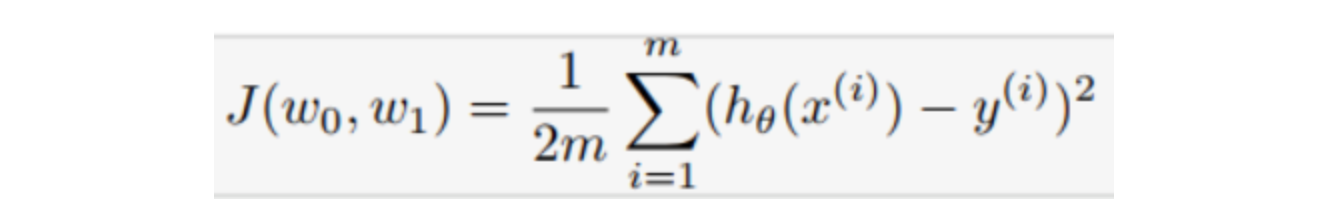

In [14]:
def cost_function(h, y):
    return (1 / (2 * len(y))) * np.sum((h - y) ** 2)

In [15]:
print(y.shape)
cost_function(h, y)

(63,)


1403.904695760089

### Gradient Descent ★★★

- t0 : 
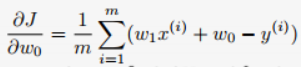
- t1 : 
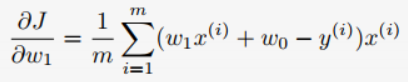

In [17]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w     # theta : 가중치 값
    m = len(y)
    
    theta_list = [theta.tolist()]  # 가중치 값 업데이트 저장
    cost = cost_function(hypothesis_function(X, theta), y)  # scalar 값
    cost_list = [cost]
    
    for i in range(iterations):
        # t0와 t1을 simultaneously하게 업데이트
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:, 1])
        theta = np.array([t0, t1])
        
        if i % 10 == 0:   # 10번마다 저장
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)
            
    return theta, theta_list, cost_list

### Do Linear Regression with GD

In [18]:
print(X.shape), print(y.shape), print(w.shape)

(63, 2)
(63,)
(2,)


(None, None, None)

In [19]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta:", theta)
print("cost:", cost)

theta: [19.8789297   3.41631869]
cost: 625.3743408312856


In [20]:
theta_list[:10]

[[1.839253932852858, 2.6610542326960145],
 [1.8746511668917458, 3.875798828292921],
 [1.964507852514366, 3.8031335406020066],
 [2.055430118245449, 3.8011703132654886],
 [2.1458938776794927, 3.7992169861673144],
 [2.2359014429896775, 3.7972735093821246],
 [2.3254551146892695, 3.795339833236382],
 [2.4145571816904168, 3.7934159083070456],
 [2.5032099213626555, 3.7915016854203056],
 [2.591415599591113, 3.78959711565033]]

In [21]:
cost_list[:5]

[1403.904695760089,
 711.051750290627,
 707.5621895616587,
 706.7353255654842,
 705.9167800250727]

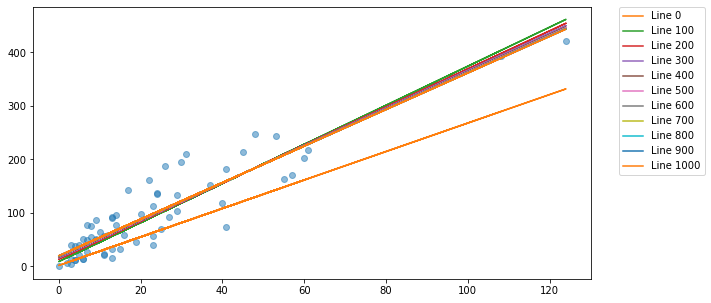

In [23]:
plt.figure(figsize = (10, 5))
theta_list = np.array(theta_list)                    # theta_list.shape = (1001, 2)
y_predict_step = np.dot(X, theta_list.transpose())   # y hat의 값

plt.plot(raw_X, y, "o", alpha = 0.5)
for i in range(0, len(cost_list), 100):   # 100번째 값들마다 plot
    plt.plot(raw_X, y_predict_step[:, i], label = "Line %d"%i)
    
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)  # bbox_to_anchor : 바운딩 박스 밖에 위치, borderaxespad : plt 축의 경계와 legend 사이에 padding
plt.show()

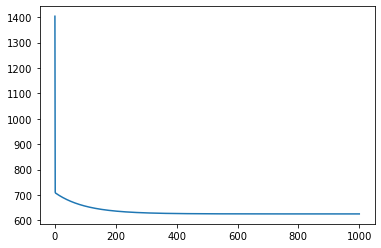

In [24]:
plt.plot(range(len(cost_list)), cost_list)

### 등고선(Contour) 그리기

In [25]:
th0 = theta_list[:,0]
th1 = theta_list[:,1]
TH0, TH1 = np.meshgrid(th0, th1)   # meshgrid : 3D graph를 위해 x, y값을 받아 좌표 행렬을 return(TH0.shape, TH1.shape : (1001, 1001))

In [26]:
TH0, TH1

(array([[ 1.83925393,  1.87465117,  1.96450785, ..., 19.87722302,
         19.87781436, 19.87840272],
        [ 1.83925393,  1.87465117,  1.96450785, ..., 19.87722302,
         19.87781436, 19.87840272],
        [ 1.83925393,  1.87465117,  1.96450785, ..., 19.87722302,
         19.87781436, 19.87840272],
        ...,
        [ 1.83925393,  1.87465117,  1.96450785, ..., 19.87722302,
         19.87781436, 19.87840272],
        [ 1.83925393,  1.87465117,  1.96450785, ..., 19.87722302,
         19.87781436, 19.87840272],
        [ 1.83925393,  1.87465117,  1.96450785, ..., 19.87722302,
         19.87781436, 19.87840272]]),
 array([[2.66105423, 2.66105423, 2.66105423, ..., 2.66105423, 2.66105423,
         2.66105423],
        [3.87579883, 3.87579883, 3.87579883, ..., 3.87579883, 3.87579883,
         3.87579883],
        [3.80313354, 3.80313354, 3.80313354, ..., 3.80313354, 3.80313354,
         3.80313354],
        ...,
        [3.41635554, 3.41635554, 3.41635554, ..., 3.41635554, 3.41635554

In [31]:
Js = np.array([cost_function(y, hypothesis_function(X, [th0, th1])) for th0, th1 in zip(np.ravel(TH0), np.ravel(TH1))])
Js = Js.reshape(TH0.shape)

<a list of 7 text.Text objects>

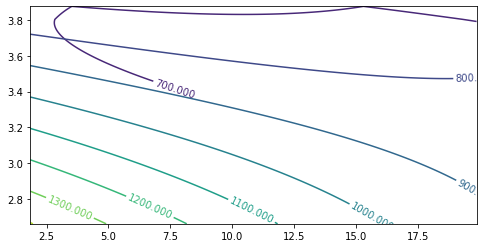

In [37]:
plt.figure(figsize = (8, 4))
CS = plt.contour(TH0, TH1, Js)
plt.clabel(CS, inline = True, fontsize = 10, inline_spacing = 2)    # Label a contour plot

In [38]:
from mpl_toolkits.mplot3d import Axes3D

ms = np.linspace(theta[0] - 15, theta[0] + 15, 100)
bs = np.linspace(theta[1] - 15, theta[1] + 15, 100)

M, B = np.meshgrid(ms, bs)    # shape : (100, 100)

zs = np.array([cost_function(y, hypothesis_function(X, theta)) for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'color'
  """


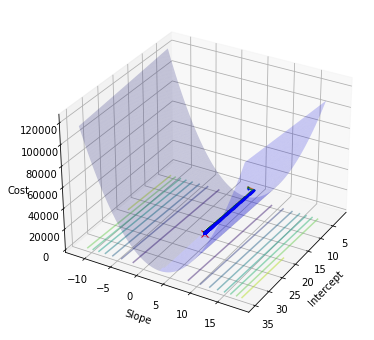

In [40]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection = '3d')

ax.plot_surface(M, B, Z, rstride = 1, cstride = 1, color = 'b', alpha = 0.2)   # Create a surface plot. (rstride, cstride : 색의 변화율을 설정하는 것으로 기본값은 1, 더 큰 값일수록 색이 크게 바뀜)
ax.contour(M, B, Z, 10, color = 'b', alpha = 0.5, offset = 0, stride = 30)

ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost')
ax.view_init(elev = 30, azim = 30)    # elevation, angle
ax.plot([theta[0]], [theta[1]], [cost_list[-1]], markerfacecolor = 'r', markeredgecolor = 'r', marker = 'x', markersize = 7)   # markerfacecolor : 마커 내부 색, markeredgecolor : 마커 윤곽선 색
ax.plot(theta_list[:, 0], theta_list[:, 1], cost_list, markerfacecolor = 'g', markeredgecolor = 'g', marker = 'o', markersize = 1)
ax.plot(theta_list[:, 0], theta_list[:, 1], 0, markerfacecolor = 'b', markeredgecolor = 'b', marker = '.', markersize = 2)